# Predicting customer satisfaction using Classification
### Machine Learning Zoomcamp - Midterm Project
Binary classification project for the Santander Customer Satisfaction competition hosted on Kaggle.  

In [2]:
# !pip install -U kaggle

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Exploratory Data Analysis (EDA)

In [4]:
# !kaggle competitions download -c santander-customer-satisfaction

In [5]:
# !unzip -o santander-customer-satisfaction.zip -d data

In [6]:
df = pd.read_csv('data/train.csv')

In [7]:
# df_train.info(verbose=True, show_counts=True)

In [8]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [9]:
df.isnull().mean()

ID                         0.0
var3                       0.0
var15                      0.0
imp_ent_var16_ult1         0.0
imp_op_var39_comer_ult1    0.0
                          ... 
saldo_medio_var44_hace3    0.0
saldo_medio_var44_ult1     0.0
saldo_medio_var44_ult3     0.0
var38                      0.0
TARGET                     0.0
Length: 371, dtype: float64

Target values

In [10]:
df.TARGET.value_counts() / df.shape[0]

TARGET
0    0.960431
1    0.039569
Name: count, dtype: float64

Only 4% of records are labeled as satisfied customers.

## Data Preparation

In [11]:
df_full_train = df

In [12]:
df_test = pd.read_csv('data/test.csv')

In [13]:
df_full_train.var3.value_counts()

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64

In [14]:
df_test.var3.value_counts()

var3
 2         73962
-999999      120
 8           116
 9           108
 13          107
           ...  
 113           1
 220           1
 199           1
 101           1
 225           1
Name: count, Length: 199, dtype: int64

In [15]:
# Missing values are coded as -999999. Replace them as NaN
for df in [df_full_train, df_test]:
    df['var3'] = df['var3'].replace(to_replace=-999999, value=2)

In [16]:
df_full_train.describe().round()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,...,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0,76020.0
mean,75964.0,3.0,33.0,86.0,72.0,120.0,4.0,6.0,0.0,1.0,...,8.0,1.0,12.0,9.0,32.0,2.0,76.0,57.0,117236.0,0.0
std,43782.0,9.0,13.0,1615.0,339.0,546.0,93.0,154.0,31.0,37.0,...,456.0,114.0,783.0,538.0,2013.0,148.0,4040.0,2853.0,182665.0,0.0
min,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5164.0,0.0
25%,38105.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67871.0,0.0
50%,76043.0,2.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106409.0,0.0
75%,113749.0,2.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118756.0,0.0
max,151838.0,238.0,105.0,210000.0,12888.0,21025.0,8238.0,11074.0,6600.0,6600.0,...,50004.0,20386.0,138832.0,91779.0,438329.0,24650.0,681463.0,397884.0,22034739.0,1.0


In [17]:
del df_full_train['ID']
del df_test['ID']

In [18]:
# Split data
df_train, df_val = train_test_split(df_full_train, test_size=0.20, random_state=1)

In [19]:
display(df_train.shape)
display(df_val.shape)
display(df_test.shape)

(60816, 370)

(15204, 370)

(75818, 369)

In [20]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [21]:
y_train = df_train['TARGET'].values
y_val = df_val['TARGET'].values

del df_train['TARGET']
del df_val['TARGET']

### Transform data into vectors

In [22]:
from sklearn.feature_extraction import DictVectorizer

In [23]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [24]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

## Decision tree classification using Scikit-Learn

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

### Training with default parameters

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
# dt.predict_proba(X_val) returns
# [probability of class 0, probability of class 1]
dt.predict_proba(X_val)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [30]:
# Validation
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.5727875018896795

In [31]:
# Evaluate AUC on the training dataset
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.999320440276767

### Decision tree parameter tuning

In [32]:
# Training models with different values of max_depth
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.675
   2 -> 0.772
   3 -> 0.798
   4 -> 0.803
   5 -> 0.806
   6 -> 0.811
   7 -> 0.811
   8 -> 0.816
   9 -> 0.812
  10 -> 0.808
  15 -> 0.763
  20 -> 0.683
None -> 0.574


In [33]:
# Training models with different values of min_samples_leaf
scores = []

for depth in [6, 7, 8, 9]:
    for s in [1, 5, 10, 15, 20, 50, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [34]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [35]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                     
max_depth             6      7      8      9
min_samples_leaf                            
1                 0.811  0.812  0.816  0.812
5                 0.817  0.813  0.804  0.806
10                0.812  0.806  0.802  0.802
15                0.812  0.809  0.808  0.810
20                0.816  0.811  0.808  0.804
50                0.817  0.814  0.810  0.809
100               0.817  0.820  0.818  0.816
200               0.819  0.820  0.815  0.815
500               0.815  0.817  0.818  0.817

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

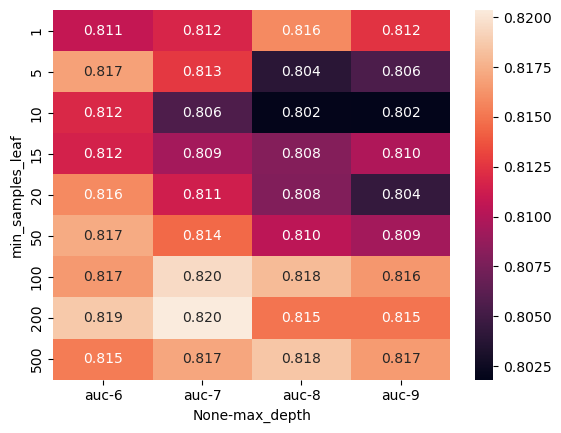

In [36]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [37]:
# Training final decision tree model
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=200)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=200)

In [38]:
# Evaluate AUC on the training dataset
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.8437048122432725

In [39]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- saldo_var30 <= 2.45
|   |--- var15 <= 27.50
|   |   |--- var38 <= 57022.04
|   |   |   |--- var15 <= 23.50
|   |   |   |   |--- var38 <= 37418.27
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- var38 >  37418.27
|   |   |   |   |   |--- var38 <= 46096.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- var38 >  46096.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- var15 >  23.50
|   |   |   |   |--- class: 0
|   |   |--- var38 >  57022.04
|   |   |   |--- var15 <= 25.50
|   |   |   |   |--- num_var45_hace3 <= 1.50
|   |   |   |   |   |--- var38 <= 124683.15
|   |   |   |   |   |   |--- var38 <= 117271.36
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- var38 >  117271.36
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- var38 >  124683.15
|   |   |   |   |   |   |--- var38 <= 247136.88
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- var38 >  247136.88
|   |   |   |   |   |   |   |--- class

## Random forest classification using Scikit-Learn 

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Training models with different values of n_estimators
scores = []

for n in range(10, 201, 10):
    # n_estimators = number of models or trees
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
 
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [42]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

Text(0, 0.5, 'AUC score')

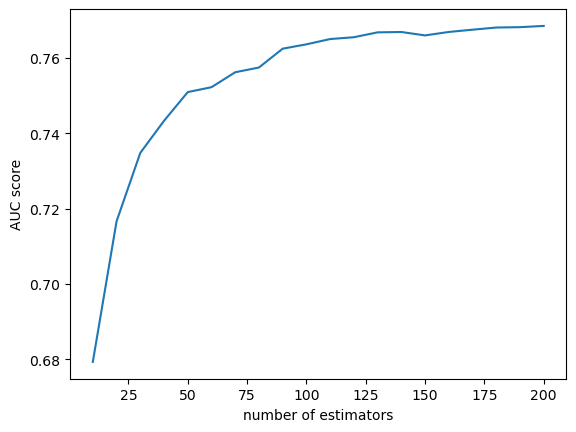

In [43]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("number of estimators")
plt.ylabel("AUC score")

Best AUC score at ~200 trees.

In [44]:
# Training models with different values of max_depth
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [45]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.789369
1,5,20,0.794948
2,5,30,0.794285
3,5,40,0.794385
4,5,50,0.797426


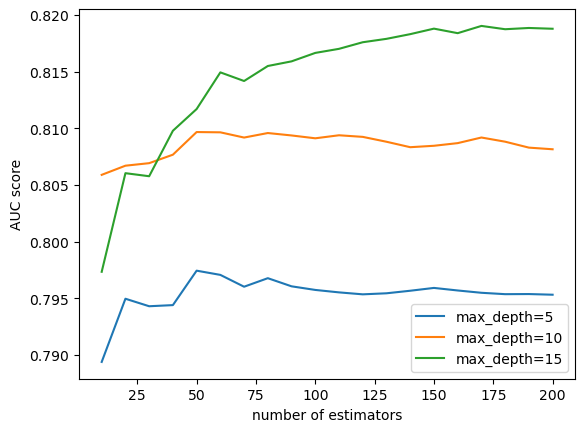

In [46]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)
    plt.xlabel("number of estimators")
    plt.ylabel("AUC score")

plt.legend()

Best AUC score at max_depth=15

In [47]:
max_depth = 15

In [48]:
# Training models with different values of min_samples_leaf
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [49]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

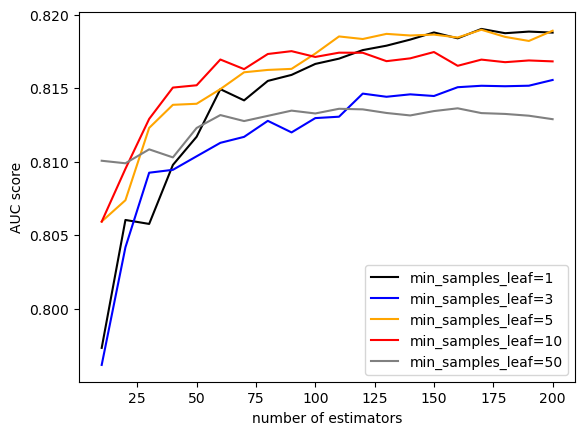

In [50]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)
    plt.xlabel("number of estimators")
    plt.ylabel("AUC score")

plt.legend()

Best AUC score at min_samples_leaf=5

In [51]:
min_samples_leaf = 5

In [52]:
# Training final random forest model

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [53]:
# Validation
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8203594837719265

In [54]:
# Evaluate AUC on the training dataset
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.8437048122432725

## Classification using XGBoost

In [25]:
import xgboost as xgb

In [26]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

### Training with default parameters

In [27]:
xgb_params = {
    'eta': 0.3, # learning rate
    'max_depth': 6, # Maximum depth of a tree
    'min_child_weight': 1, # similar to min_samples_leaf
    
    'objective': 'binary:logistic',
    'nthread': 8, # Number of parallel threads used to run XGBoost
    
    'seed': 1,
    'verbosity': 1, # Verbosity of printing messages
}

# num_boost_round => Number of boosting iterations.
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [28]:
y_pred = model.predict(dval)

In [29]:
roc_auc_score(y_val, y_pred)

0.8344979210969784

In [30]:
# evals => List of validation sets for which metrics will evaluated during training
watchlist = [(dtrain, 'train'), (dval, 'val')]

Add an evaluation metric at each boosting stage:

In [31]:
%%capture output 
# saves evaluation logs as 'output'

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

# Print evaluation scores every 'verbose_eval' boosting stages
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5, evals=watchlist)

In [32]:
s = output.stdout

In [33]:
# Extract scores from 'output'
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [39]:
df_score = parse_xgb_output(output)
df_score.head(10)

,num_iter,train_auc,val_auc
0,0,0.83647,0.81516
1,5,0.86188,0.83308
2,10,0.87687,0.83604
3,15,0.88383,0.83740
4,20,0.89046,0.83582
5,25,0.89401,0.83488
6,30,0.89875,0.83447
7,35,0.90171,0.83570
8,40,0.90676,0.83402
9,45,0.90954,0.83324


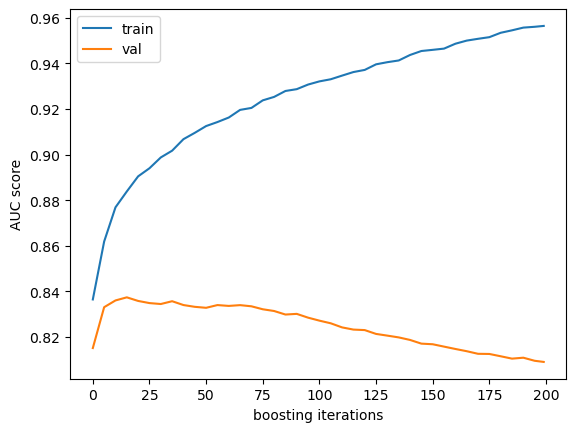

In [37]:
# Plot evaluation scores
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.xlabel("boosting iterations")
plt.ylabel("AUC score")
plt.legend()

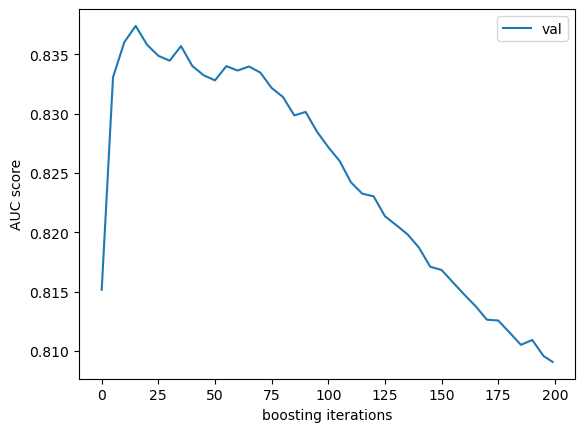

In [38]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.xlabel("boosting iterations")
plt.ylabel("AUC score")
plt.legend()

### XGBoost parameter tuning

#### eta (learning rate)

In [40]:
scores = {}

In [41]:
etas = [0.01, 0.05, 0.1]

In [42]:
%%capture output

for eta in etas:    
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                      verbose_eval=5,
                      evals=watchlist)

In [43]:
parse_output = parse_xgb_output(output)
rows_per_eta = len(parse_output) // len(etas)

for i, eta in enumerate(etas): 
    key = 'eta=%s' % (eta)
    start_row = i * rows_per_eta
    end_row = (i + 1) * rows_per_eta
    scores[key] = parse_output[start_row:end_row]

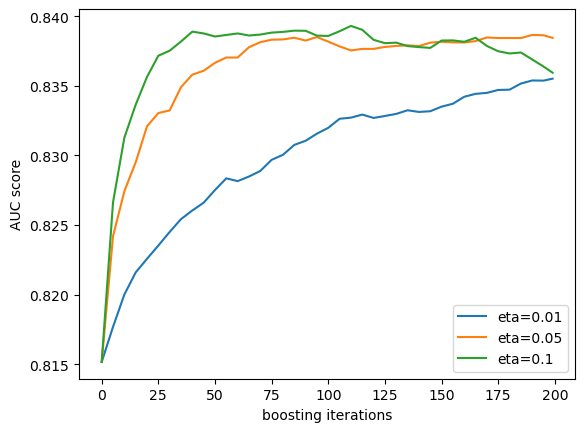

In [44]:
for key, df_score in list(scores.items()):
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)

plt.xlabel('boosting iterations')
plt.ylabel('AUC score')
plt.legend()

Best AUC score at ~110 iterations with an eta of 0.1.

#### max_depth

In [51]:
scores = {}

In [52]:
max_depths = [3, 4, 6, 10]

In [53]:
%%capture output

for max_depth in max_depths:
    xgb_params = {
        'eta': 0.1, 
        'max_depth': max_depth,
        'min_child_weight': 1,
 
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                      verbose_eval=5,
                      evals=watchlist)

In [54]:
parse_output = parse_xgb_output(output)
rows_per_depth = len(parse_output) // len(max_depths)

for i, max_depth in enumerate(max_depths): 
    key = 'max_depth=%s' % (max_depth)
    start_row = i * rows_per_depth
    end_row = (i + 1) * rows_per_depth
    scores[key] = parse_output[start_row:end_row]

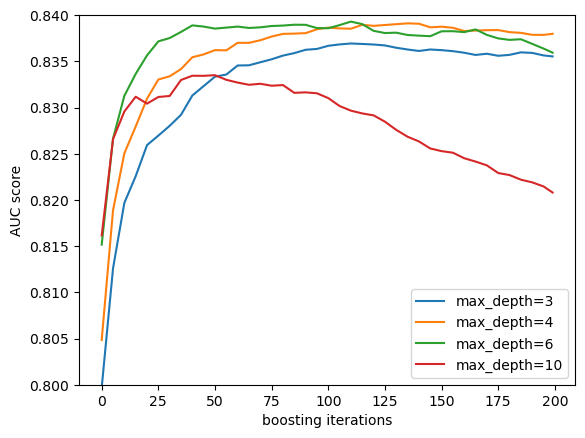

In [55]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.xlabel('boosting iterations')
plt.ylabel('AUC score')
plt.ylim(0.8, 0.84)
plt.legend()

Best AUC scoret ~110 iterations with a max_depth of 6.

#### min_child_weight

In [56]:
scores = {}

In [57]:
min_child_weights = [1, 10, 30]

In [58]:
%%capture output

for min_child_weight in min_child_weights:
    xgb_params = {
        'eta': 0.1, 
        'max_depth': 6,
        'min_child_weight': min_child_weight,

        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                      verbose_eval=5,
                      evals=watchlist)

In [59]:
parse_output = parse_xgb_output(output)
rows_per_weight = len(parse_output) // len(min_child_weights)

for i, min_child_weight in enumerate(min_child_weights): 
    key = 'min_child_weight=%s' % (min_child_weight)
    start_row = i * rows_per_weight
    end_row = (i + 1) * rows_per_weight
    scores[key] = parse_output[start_row:end_row]

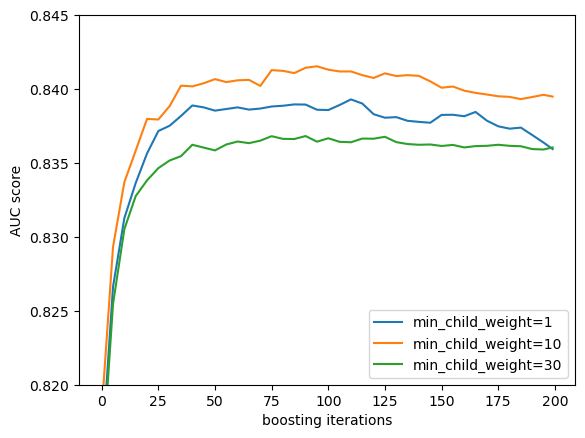

In [65]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.xlabel('boosting iterations')
plt.ylabel('AUC score')
plt.ylim(0.82, 0.845)
plt.legend()

Best AUC score at ~110 iterations with a min_child_weight of 10.

#### Training final XGboost model

In [66]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=110)

In [115]:
# Validation
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8411246622854498

In [116]:
# Evaluate AUC on the training dataset
y_pred = model.predict(dtrain)
roc_auc_score(y_train, y_pred)

0.8853543057545729

## Submit solution to Kaggle

### Prepare test data

In [87]:
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)
dtest = xgb.DMatrix(X_test, feature_names=features)

### Make predictions

In [93]:
y_pred_sub = model.predict(dtest)
y_pred_sub

array([0.03204225, 0.04383954, 0.00132324, ..., 0.00289886, 0.08052487,
       0.00082174], dtype=float32)

In [99]:
predictions = [round(value) for value in y_pred_sub]

### Prepare and submit file

In [108]:
df_sub = pd.read_csv('data/sample_submission.csv')

In [109]:
df_sub['TARGET'] = np.array(predictions)

In [110]:
df_sub.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [111]:
df_sub.to_csv("submission.csv", index=False)

In [112]:
!kaggle competitions submit -c santander-customer-satisfaction -f submission.csv -m "first submission"

Successfully submitted to Santander Customer Satisfaction


  0%|          | 0.00/686k [00:00<?, ?B/s]
  1%|1         | 8.00k/686k [00:00<00:31, 22.4kB/s]
 27%|##6       | 184k/686k [00:00<00:01, 506kB/s]  
100%|##########| 686k/686k [00:01<00:00, 440kB/s]


### View submissions

In [114]:
!kaggle competitions submissions -c santander-customer-satisfaction

fileName        date                 description       status    publicScore  privateScore  
--------------  -------------------  ----------------  --------  -----------  ------------  
submission.csv  2023-11-03 19:32:13  first submission  complete  0.50229      0.5013        
